In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load the dataset (using CIFAR-10 as an example, but you can replace it with your own dataset)
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset (for example purposes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the CNN model
model = Sequential()

# Convolutional Layer, activation layer, pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten into a 1D vector
model.add(Flatten())

# Fully Connected Layer
model.add(Dropout(0.5))  # Dropout layer for regularization

# Output Layer (softmax activation for classification)
model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.3813 - loss: 1.7423 - val_accuracy: 0.5344 - val_loss: 1.3102
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 70ms/step - accuracy: 0.5567 - loss: 1.2698 - val_accuracy: 0.5895 - val_loss: 1.1756
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.6020 - loss: 1.1601 - val_accuracy: 0.6051 - val_loss: 1.1428
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - accuracy: 0.6164 - loss: 1.1080 - val_accuracy: 0.6317 - val_loss: 1.0748
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6336 - loss: 1.0646 - val_accuracy: 0.5887 - val_loss: 1.1852
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.6449 - loss: 1.0383 - val_accuracy: 0.6299 - val_loss: 1.0687
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6528 - loss: 1.0083 - val_accuracy: 0.6377 - val_loss: 1.0503
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.6541 - loss: 0.9923 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


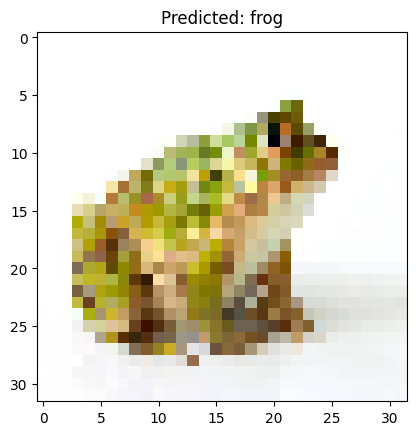

Class probabilities:
airplane: 0.0000
automobile: 0.0000
bird: 0.0000
cat: 0.0002
deer: 0.0000
dog: 0.0000
frog: 0.9995
horse: 0.0000
ship: 0.0000
truck: 0.0003
Predicted label: frog


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load, preprocess and predict an image
def detect_image(image_path, model):
    # Load the image
    img = image.load_img(image_path, target_size=(32, 32))  # Resize the image to match model's input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)[0]  # Get probabilities for all classes

    # Map the predicted class index to the class label
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # CIFAR-10 classes

    # Get the predicted class (highest probability)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    # Print probabilities for each class
    print("Class probabilities:")
    for label, prob in zip(class_labels, prediction):
        print(f"{label}: {prob:.4f}")

    return predicted_label, prediction

# Example of how to use the detect_image function
image_path = '/content/Frog-Capture.JPG'  # Replace with the path to your image
predicted_label, probabilities = detect_image(image_path, model)
print(f"Predicted label: {predicted_label}")
